In [ ]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, accuracy_score, precision_score

np.random.seed(42)

## Data set 

This project's objective is to develop a data-driven predictive model for the power consumption of an industrial refrigeration system using the `Data_Rack01` dataset.  
The data frame contains the following data, where each row represents a datapoint:

- Dew_Point: the temperature to which air must be cooled to become saturated with water vapor 
- Indoor_Humidity: The indoor Humidity
- Indoor_Temperature: The indoor temprature (Fahrenheit)
- Outdoor_Humidity: The outdoor humidity
- Outdoor_Temperature: The outdoor temprature (Fahrenheit)
- Discharge_Pressure: The pressure generated on the output side of a gas compressor in a refrigeration system
- Discharge_Temperature: The compressor's discharge temperature 
- KW: Power consumed
- Power_Factor: The power factor of the refrigeration system
- Volts_Line_to_Line
- Volts_Line_to_Neutral

### a) Preprocess the data acording to the following:

1. Load data into a variable called myData
2. In the `myPreProc` function perform the following:
  - Remove the empty column(s), 
  - Drop rows with any missing data ("NA").
  - Remove the 'DeviceName' column as well

The processed data should be returned through the function variable `procData`

### b) Define two loss functions:
- one that measures the absolute difference between observations and predictions. Return mean and standard deviation of the result.
- one that finds the absolute difference that is less than or equal to a threshold. Return mean and standard deviation of the result.

### c) Data splitting:
- Use power consumption as the target variable for your machine learning model. 
- Split your preprocessed dataset by setting aside some amount of data for testing, and retaining the rest for training. Reserve 30 percent of your data for testing. *Make sure to set the random_state to 42 if you are using an sklearn function to accomplish this. 


### d) Build a linear regression model:
- Using Ordinary Least Squares, build a model to predict power consumed (KW) as a `linear function` of the other variables (features) in the dataset. In order to properly build the regression model, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. Build the pipeline that standardizes the features and creates a linear regression model.
- Report the coefficient of determination (`R2 score`) when evaluating both the training and testing performance of your model.

In [ ]:
#Part 1a

#load data
df = pd.read_csv('Data_Rack01.csv')
myData = pd.DataFrame(df)

def myPreProc(data):

  #remove empty columns
  data.dropna(how="all", axis=1, inplace=True)

  #drop rows with any missing data.
  data.dropna(how="all", axis=0, inplace=True)

  #remove the 'DeviceName' column
  data.drop('DeviceName', axis=1, inplace=True)

  procData = data

  return procData

In [ ]:
#Part 1b

def abs_diff_loss(obs, pred):
    
    resids = abs(obs-pred)

    return resids.mean(), resids.std(ddof=1)
    
def threshold_loss(obs, pred, thresh):
    
    if abs(obs-pred) <= thresh : resids = abs(obs-pred)
    
    return resids.mean(), resids.std(ddof=1)

In [ ]:
#Part 1c

myPreProc(myData)

#Set power consumed variable to be the target varibale
X = myData.drop('kW', axis=1).values
y = myData['kW'].values

#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, shuffle=True)

# display(y)
print(X_train.shape)
print(X.shape)
print(X_test.shape)

(18025, 9)
(25751, 9)
(7726, 9)


In [ ]:
#Part 1d
estimator_linear = [('scaler', StandardScaler()), 
                    ('linearRegression', LinearRegression())]
pipe_linear = Pipeline(estimator_linear)
pipe_linear.fit(X_train, y_train)
y_pred = pipe_linear.predict(X_test)
score = pipe_linear.score(X_test, y_test)
print("R2 Socre is", score)

R2 Socre is 0.4240761933328049


- Use L2 regularization by adding a penalty of $\lambda \sum_{i}{\beta_i^2}$ (where $\beta_i$ are your regression coefficients) to the regression model. Vary the regularization parameter $\lambda$ between 0.2 and 250, evenly spaced in log-space, and generate 50 values. 
- Build the pipeline that standardizes the features and create a regularized regression model.
- Determine the 10-fold crossvalidated performance for different values of the L2-regularization parameters. Use the cross-validated R-Squared (R2) of the data under the model as evaluation criterion.  
- Make a plot of the cross-validated R-Squared (R2) against $log(\lambda)$. 
- Report the best lambda that you found

In [ ]:
para_space = np.logspace(np.log10(0.2), np.log10(250), num=50)

r2_score_list = []
for i in para_space:
  estimator_ridge = [('scaler', StandardScaler()),
                   ('ridge', Ridge(alpha=i))]
  pipe_ridge = Pipeline(estimator_ridge)                
  pipe_ridge.fit(X_train, y_train)
  r2_score = cross_val_score(pipe_ridge, X_train, y_train, cv=10)
  r2_score_list.append(r2_score.mean())

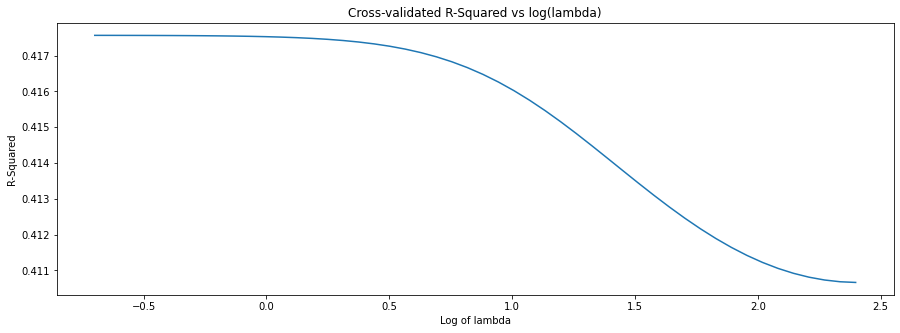

In [ ]:
x_axis = np.log10(para_space)
y_axis = r2_score_list

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.plot(x_axis, y_axis)

plt.xlabel("Log of lambda")
plt.ylabel("R-Squared")

plt.title("Cross-validated R-Squared vs log(lambda)")

plt.show()

In [ ]:
print("The best value of lambda found is", np.min(para_space))
print("Corresponding value of R Squared is", np.max(r2_score_list))

The best value of lambda found is 0.20000000000000004
Corresponding value of R Squared is 0.41756297281571086


### a) Binary target:
- Convert your target variable in the dataset into a binary variable using >= mean thresholding (use the same data splitting as before). 

### b) Build logistic regression model:
- Define a Logistic Regression model and report the resulting *training* precision and *testing* accuracy of your model. Make sure the set the maximum number of iterations for your model to 10000 (use pipeline for normalization and model building same as Questions 1 and 2).

### c) Build a Support Vector Machine (SVM) model:
- Define a linear SVM model with default options and maximum number of iterations 10000. Report the resulting *training* precision and *testing* accuracy of your model (use pipeline for normalization and model building same as Questions 1 and 2).


### d) Comparison:
- Compare the performance of your models in `b` and `c` in terms of generalization performance and execution time, what do you conclude? 

In [ ]:
#Part 3a
y_train_mean = y_train.mean()
print(y_train_mean)

#training
y_train_new = np.copy(y_train)
y_train_new[y_train_new < y_train_mean] = 0
y_train_new[y_train_new >= y_train_mean] = 1
print(y_train_new)

#testing
y_test_new = np.copy(y_test)
y_test_new[y_test_new < y_train_mean] = 0
y_test_new[y_test_new >= y_train_mean] = 1
print(y_test_new)

94.12388349514563
[0. 1. 0. ... 1. 0. 1.]
[0. 1. 1. ... 0. 1. 0.]


In [ ]:
#Part 3b
estimator_logistic = [('scaler', StandardScaler()), 
                      ('logistic', LogisticRegression(max_iter=10000))]
pipe_logistic = Pipeline(estimator_logistic)
pipe_logistic.fit(X_train, y_train_new)

# Calculate the predicted value for training and test dataset
y_train_pred = pipe_logistic.predict(X_train)
y_test_pred = pipe_logistic.predict(X_test)

training_precision = precision_score(y_train_new, y_train_pred)
testing_accuracy = accuracy_score(y_test_new, y_test_pred)
print("Training Precision score for Logistic Regression is", training_precision)
print("Testing Accuracy score for Logistic Regression is", testing_accuracy)

Training Precision score for Logistic Regression is 0.804956988331488
Testing Accuracy score for Logistic Regression is 0.8020968159461558


In [ ]:
#Part 3c
estimator_svc = [('scaler', StandardScaler()), 
                 ('svc', LinearSVC(max_iter=10000))]
pipe_svc = Pipeline(estimator_svc)
pipe_svc.fit(X_train, y_train_new)

# Calculate the predicted value for training and test dataset
y_train_pred = pipe_svc.predict(X_train)
y_test_pred = pipe_svc.predict(X_test)

training_precision = precision_score(y_train_new, y_train_pred)
testing_accuracy = accuracy_score(y_test_new, y_test_pred)
print("Training Precision score for LinearSVC is", training_precision)
print("Testing Accuracy score for LinearSVC is", testing_accuracy)

Training Precision score for LinearSVM is 0.7838938197215211
Testing Accuracy score for LinearSVM is 0.7881180429717836


*Part 3d*


Training precision measures the accuracy of the model's predictions on the training data. It reflects how well the model fits the training data. 

Testing accuracy measures the accuracy of the model's predictions on the testing data. It reflects the model's ability to generalize to new data.

Speaking of two models above, there is only small difference between the training precision and testing accuracy, which indicates that these two models have a good generalization performance.

As observed, LinearSVC takes longer execution time than Logistic Regression. It is because LinearSVC solves the optimization problem using the "one-vs-one" or "one-vs-the-rest" technique, where multiple binary classification problems are solved to determine the final class prediction.

On the other hand, Logistic Regression solves the problem by using maximum likelihood estimation, which is obviously simpler than LinearSVC.